<a href="https://www.kaggle.com/code/piyushjain572/feature-scaling-standardization?scriptVersionId=199132253" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [23]:
df.drop(columns=['User ID'],inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [24]:
# splitting into training and testing before scaling to avoid data leakage
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Purchased']),
                                                 df['Purchased'],
                                                 test_size=0.2,
                                                 random_state=2)
print(X_train.shape)
print(X_train)
print(X_test.shape)
print(X_test)

(320, 3)
     Gender  Age  EstimatedSalary
205  Female   47            47000
354    Male   36            99000
3    Female   27            57000
264    Male   48            90000
194    Male   28            89000
..      ...  ...              ...
299    Male   46           117000
22     Male   48            41000
72   Female   20            23000
15     Male   29            80000
168    Male   29           148000

[320 rows x 3 columns]
(80, 3)
     Gender  Age  EstimatedSalary
94   Female   29            83000
32   Female   21            16000
225    Male   37            53000
157    Male   29            75000
356    Male   54            70000
..      ...  ...              ...
188    Male   35            72000
223    Male   60           102000
65     Male   24            58000
262  Female   55           125000
186  Female   20            82000

[80 rows x 3 columns]


In [25]:
# Before Applying scaling, check for missing values and sparsity. 
#Also drop categorical features
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 205 to 168
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           320 non-null    object
 1   Age              320 non-null    int64 
 2   EstimatedSalary  320 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.0+ KB


In [26]:
#Applying Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train.drop(columns=['Gender']))

X_train_scaled = scaler.transform(X_train.drop(columns=['Gender']))
X_test_scaled = scaler.transform(X_test.drop(columns=['Gender']))
# Note: These transformations return result as np.arrays

In [27]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

In [28]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.drop(columns=['Gender']).columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_train.drop(columns=['Gender']).columns)

In [29]:
X_train_scaled

,Age,EstimatedSalary
0,0.889288,-0.659246
1,-0.172548,0.873927
2,-1.041324,-0.364405
3,0.985819,0.608570
4,-0.944793,0.579086
...,...,...
315,0.792758,1.404640
316,0.985819,-0.836150
317,-1.717038,-1.366863
318,-0.848263,0.313729


In [30]:
X_train_scaled['Gender'] = X_train['Gender'].values #Passing as arrays otherwise index will also come
X_test_scaled['Gender'] = X_test['Gender'].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              320 non-null    float64
 1   EstimatedSalary  320 non-null    float64
 2   Gender           320 non-null    object 
dtypes: float64(2), object(1)
memory usage: 7.6+ KB


In [31]:
X_train_scaled

,Age,EstimatedSalary,Gender
0,0.889288,-0.659246,Female
1,-0.172548,0.873927,Male
2,-1.041324,-0.364405,Female
3,0.985819,0.608570,Male
4,-0.944793,0.579086,Male
...,...,...,...
315,0.792758,1.404640,Male
316,0.985819,-0.836150,Male
317,-1.717038,-1.366863,Female
318,-0.848263,0.313729,Male


In [38]:
np.round(X_train_scaled.describe(),decimals=3)

,Age,EstimatedSalary
count,320.000,320.000
mean,-0.000,-0.000
std,1.002,1.002
min,-1.910,-1.603
25%,-0.752,-0.777
50%,-0.076,0.004
75%,0.793,0.520
max,2.144,2.378


# Effect Of Scaling

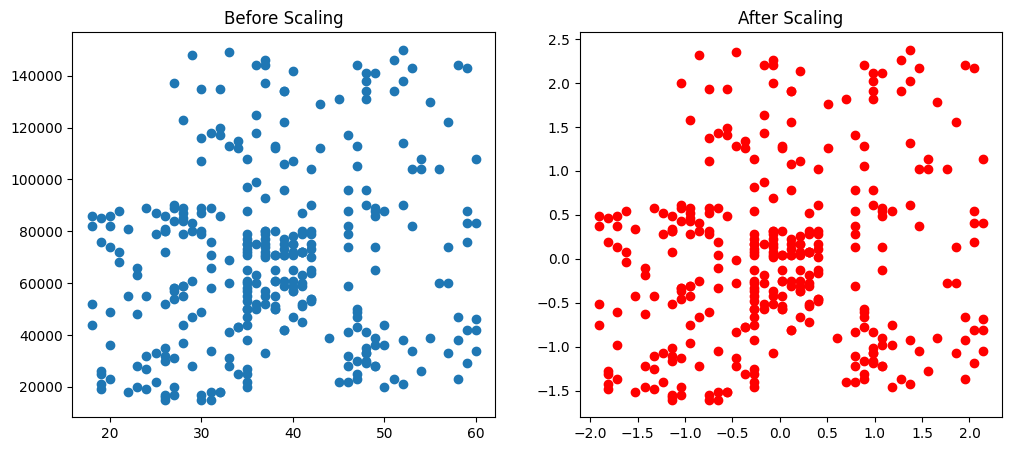

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

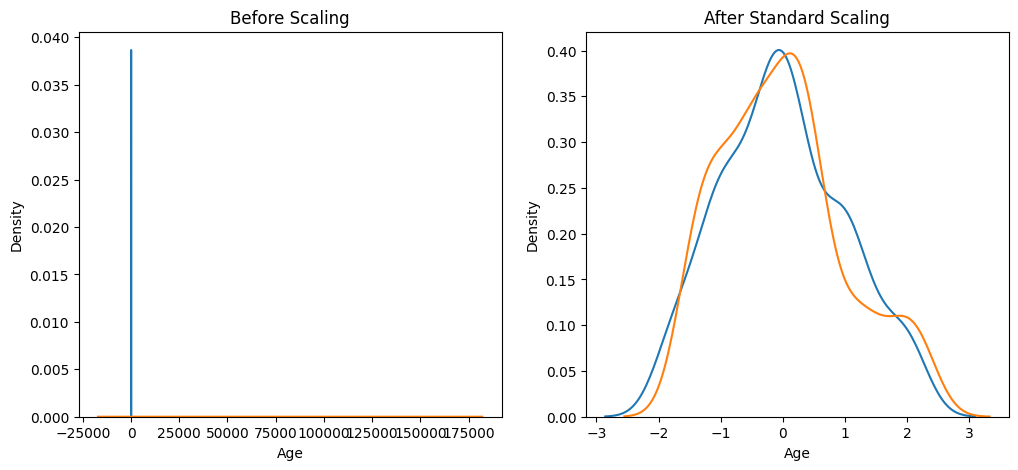

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of Distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


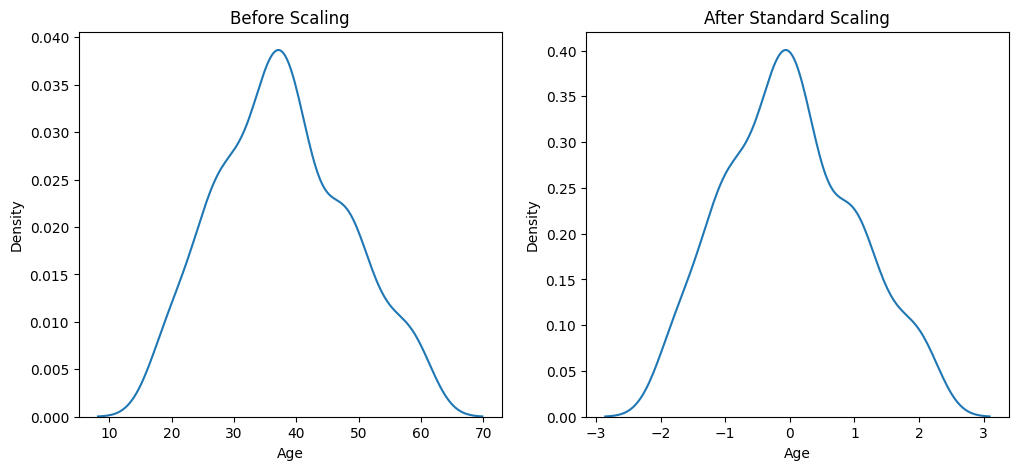

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


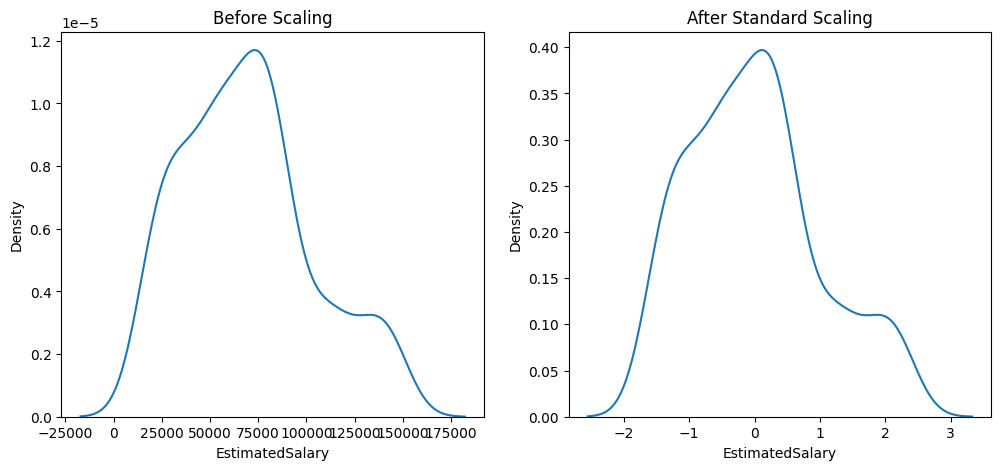

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Why Scaling is Important?

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [46]:
X_train['Gender'] = X_train['Gender'].apply(lambda x:0 if x=='Female' else 1)
X_train_scaled['Gender'] = X_train_scaled['Gender'].apply(lambda x:0 if x=='Female' else 1)

In [56]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [50]:
X_test['Gender'] = X_test['Gender'].apply(lambda x:0 if x=='Female' else 1)
X_test_scaled['Gender'] = X_test_scaled['Gender'].apply(lambda x:0 if x=='Female' else 1)

In [57]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [59]:
from sklearn.metrics import accuracy_score
print('Actual', accuracy_score(y_test,y_pred))
print('Scaled', accuracy_score(y_test,y_pred_scaled))

Actual 0.6
Scaled 0.8125


In [60]:
# Effect of scaling on tree based models
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [61]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [63]:
y_pred=dt.predict(X_test)
y_pred_scaled=dt_scaled.predict(X_test_scaled)

In [64]:
from sklearn.metrics import accuracy_score
print('Actual', accuracy_score(y_test,y_pred))
print('Scaled', accuracy_score(y_test,y_pred_scaled))

Actual 0.85
Scaled 0.8375


# Effect on Outliers

In [65]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [69]:
df = pd.concat([df,pd.DataFrame({
    'Gender': ['Female','Male','Female'],
    'Age' : [5,90,95],
    'EstimatedSalary' : [1000,250000,350000],
    'Purchased' : [0,1,1]})],ignore_index=True)

In [70]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
398,Male,36,33000,0
399,Female,49,36000,1
400,Female,5,1000,0
401,Male,90,250000,1


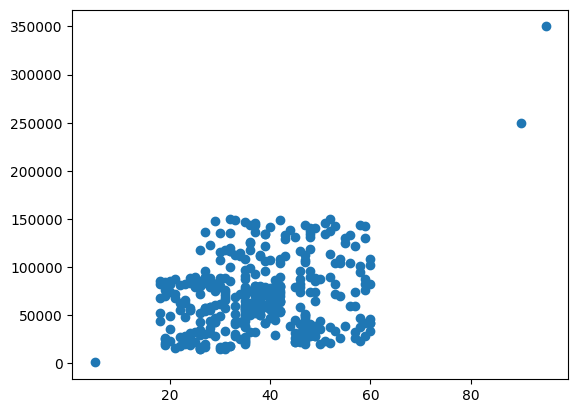

In [71]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [78]:
# splitting into training and testing before scaling to avoid data leakage
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Purchased']),
                                                 df['Purchased'],
                                                 test_size=0.2,
                                                 random_state=2)
print(X_train.shape)
print(X_test.shape)

(322, 3)
(81, 3)


In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train.drop(columns=['Gender']))

X_train_scaled = scaler.transform(X_train.drop(columns=['Gender']))
X_test_scaled = scaler.transform(X_test.drop(columns=['Gender']))

In [80]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.drop(columns=['Gender']).columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_train.drop(columns=['Gender']).columns)

In [81]:
X_train_scaled['Gender'] = X_train['Gender'].values #Passing as arrays otherwise index will also come
X_test_scaled['Gender'] = X_test['Gender'].values

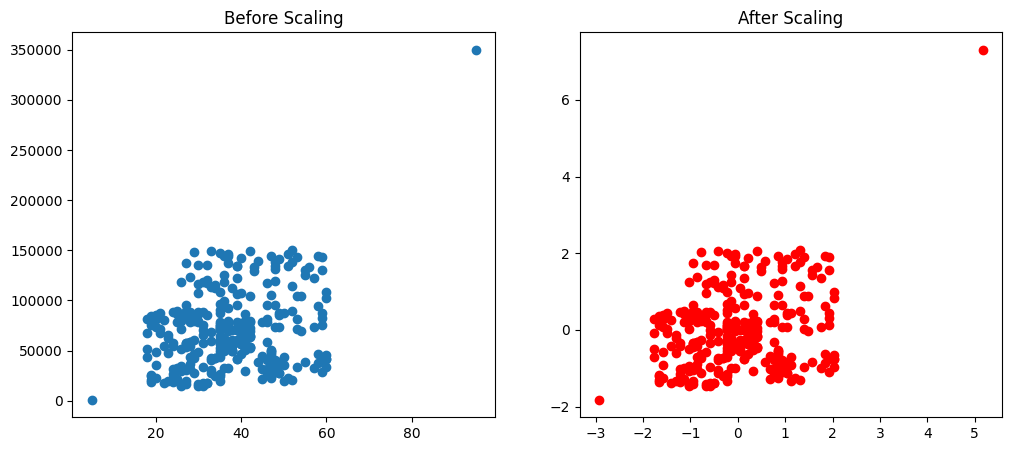

In [82]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()